# Write Text On Pictures


In [87]:
from classify_lib import *

(316, 1736, 4)


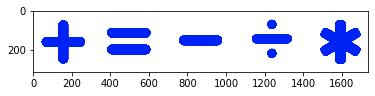

In [90]:
data_base_path = os.path.join(os.pardir, '..\\..\\data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)
    
data_path = os.path.join(data_base_path, data_folder)

im = imageio.imread('../../data/original_operators.png')
print(im.shape)
plt.imshow(im[:,:,0:3])

# Simple example how to proceed : 

In [ ]:
#from PIL import Image #normaly already imported

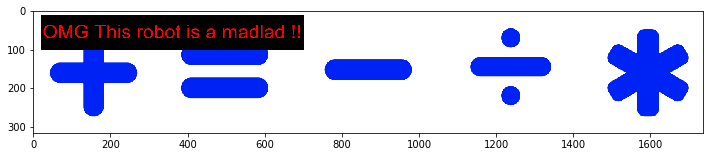

In [117]:
pic_written = write_text_on_pic(im=np.copy(im), 
                    text = 'OMG This robot is a madlad !!', text_size = 50, text_pos = (25,25), text_color = 'red', 
                    background_color = 'black', background_dim = [(20,10), (700,100)])

plt.figure(figsize = (12,8))
plt.imshow(pic_written)

# Working Area (can be usefull in one wants to change a few details)

In [ ]:
#let im = our image, which is stored in a numpy array of shape (length, width, 4)

im_PIL = Image.fromarray(np.uint8((im[:,:,0:3])))   # 1) Convert to PIL.Image.Image type
d = ImageDraw.Draw(im_PIL)                          # 2) Create an object pointing on our picture we want to modify 
d.rectangle([(10,10),(1300,120)], fill='black', outline=None) # 3) Draw a rectangle, which we can use as background
fnt = ImageFont.truetype('arial.ttf', 80)                     # 4) Create the font for the text
d.text((30,30), "omg what is this robot gonna do ?!", font = fnt, fill=(255, 50, 50)) # 5) Write the text on our picture
 
#img.save('pil_text_font.png')
#plt.imshow(im_PIL)

im_np = np.copy(np.array(im_PIL))  # 6) Convert back the PIL.Image.Image into a numpy array.
plt.imshow(im_np)

In [70]:
im.shape

(316, 1736, 4)

In [113]:
def write_text_on_pic(im, text = 'Hello', text_size = 50, text_pos = (25,25), text_color = 'red', 
                      background_color = 'black', background_dim = [(10,10), (500,120)]):
    """ 
    To write text on a picture. the image im must be an numpy array of shape (length, width, 4) or (length, width, 3)
    
    """
    copy = np.copy(im)
    if im.shape[-1] == 4:           
        im_PIL = Image.fromarray(np.uint8(copy[:,:,0:3]))    # 1) Convert to PIL.Image.Image type
    elif im.shape[-1] ==3:
        im_PIL = Image.fromarray(np.uint8(copy[:,:,0:3]))   # 1) Convert to PIL.Image.Image type
    else:
        print("Unknown type for the input image. Please Check it's either a RGB or RGBA numpy array.")
        
    d = ImageDraw.Draw(im_PIL)                          # 2) Create an object pointing on our picture we want to modify 
    d.rectangle(background_dim, fill=background_color, outline=None)     # 3) Draw a rectangle, which we can use as background
    fnt = ImageFont.truetype('arial.ttf', text_size)                     # 4) Create the font for the text
    d.text(text_pos, text, font = fnt, fill=text_color) # 5) Write the text on our picture

    #img.save('pil_text_font.png')
    #plt.imshow(im_PIL)
    
    return np.array(im_PIL) # 6) Convert back the PIL.Image.Image into a numpy array.
    #plt.imshow(im_np)

###  ================== Simple example ================

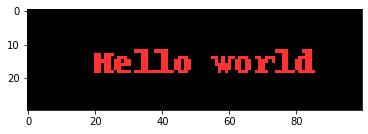

In [15]:
from PIL import Image, ImageDraw, ImageFont
 
img = Image.new('RGB', (100, 30), color = (0, 0, 0))
 
d = ImageDraw.Draw(img)
d.text((20,10), "Hello world", fill=(255, 50, 50)) #font = blablabla
 
#img.save('pil_text_font.png')
plt.imshow(img)